## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
customer_tips = pd.read_csv('tips.csv')
customer_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
customer_tips.select_dtypes(include=['int',"object"])

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


### 2. Compute the average bill amount for each day.

In [4]:
customer_tips.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [5]:
customer_tips.groupby('sex')['tip'].mean().idxmax()

'Male'

### 4. According to the data, were there more customers for dinner or lunch?

In [6]:
#customer_tips.groupby('time')['size'].count()
customer_tips['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [7]:
customer_tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [8]:
# customer_tips.day.mode()
busiestday = customer_tips['day'].value_counts().idxmax()
busiestday

'Sat'

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

Skewness of 'total_bill' column: Axes(0.125,0.11;0.775x0.77)


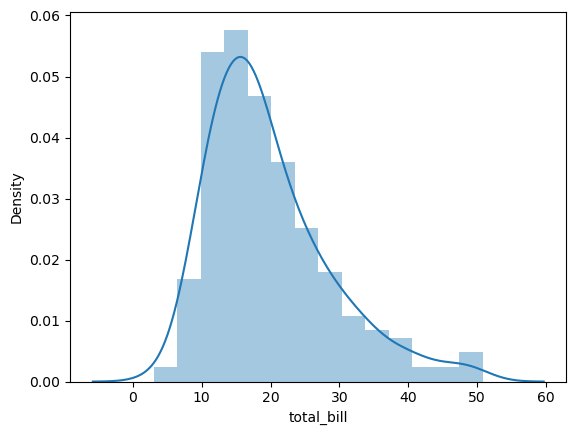

In [9]:
# Plot a histogram
skewness = sns.distplot(customer_tips['total_bill'], kde=True)

# Print skewness value
print("Skewness of 'total_bill' column:", skewness)

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

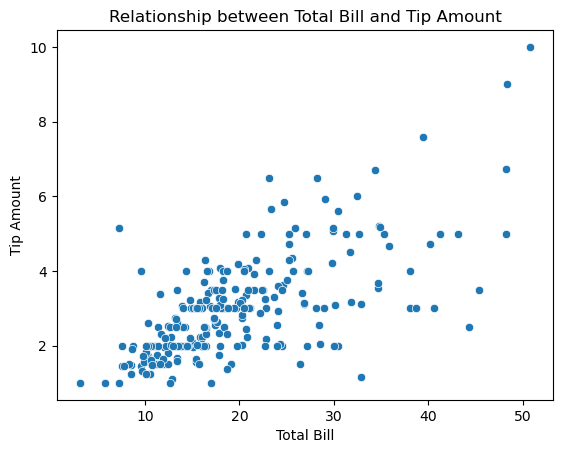

Pearson's correlation coefficient between 'total_bill' and 'tip': 0.6757341092113641


In [10]:
# Plotting the relationship with a scatter plot
sns.scatterplot(x='total_bill', y='tip', data=customer_tips)
plt.title('Relationship between Total Bill and Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

# Calculate Pearson correlation coefficient
correlation = customer_tips['total_bill'].corr(customer_tips['tip'])

print("Pearson's correlation coefficient between 'total_bill' and 'tip':", correlation)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

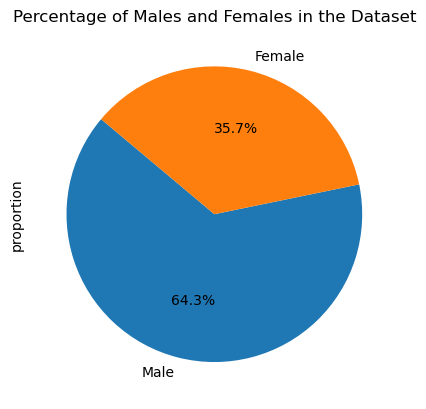

In [11]:
# Plotting the percentages in a pie chart
customer_tips['sex'].value_counts(normalize=True).plot(kind = 'pie',autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Males and Females in the Dataset')
plt.show()

### 10.Compute the gender-wise count based on smoking habits and display it in the plot

In [12]:
customer_tips.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

### 11. Compute the average tip amount given for different days and display it in the plot.

<Axes: xlabel='day', ylabel='tip'>

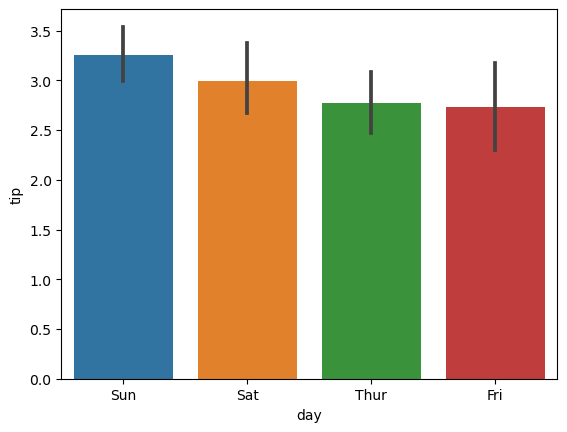

In [13]:
customer_tips.groupby('day')['tip'].value_counts().mean()
sns.barplot(x = 'day', y = 'tip',data=customer_tips)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

Yes,average bill amount dependent on the size of the group size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


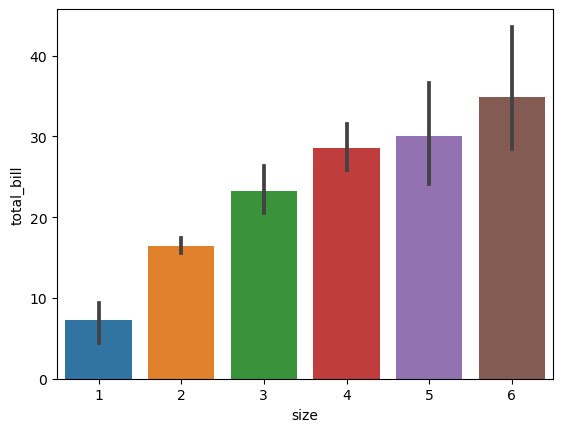

In [14]:
customer_tips.groupby('size')['total_bill'].mean().value_counts()
sns.barplot(x = 'size' , y = 'total_bill', data= customer_tips)
print('Yes,average bill amount dependent on the size of the group',customer_tips.groupby('size')['total_bill'].mean() ,)

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<Axes: xlabel='total_bill', ylabel='sex'>

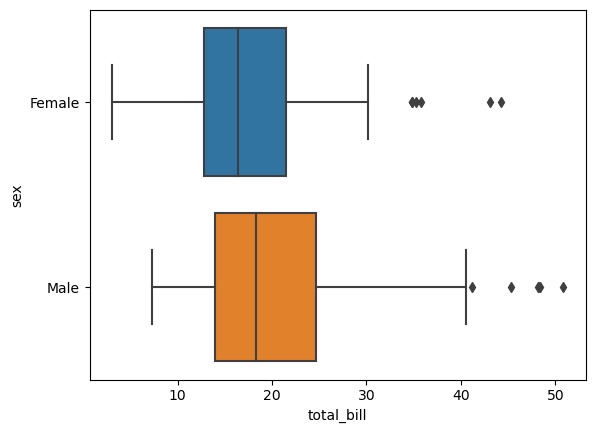

In [15]:
# customer_tips.groupby('total_bill')['sex'].count().mean()
sns.boxplot(x='total_bill' , y = 'sex' , data = customer_tips)

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [16]:
customer_tips.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [17]:
customer_tips.isnull().sum()/len(customer_tips)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [18]:
customer_tips[customer_tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [19]:
customer_tips.drop_duplicates(inplace=True)

In [20]:
customer_tips[customer_tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

a boxplot before the treatment


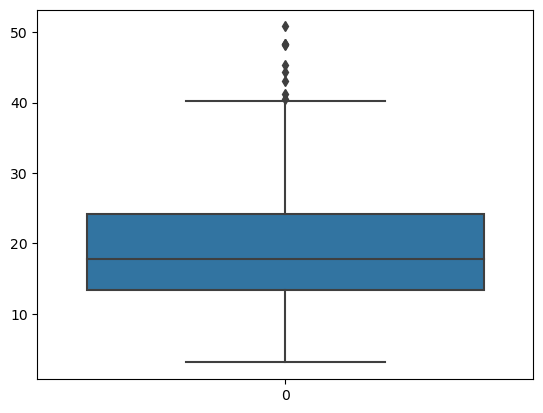

In [21]:
print('a boxplot before the treatment')
sns.boxplot(customer_tips['total_bill'])
plt.show()

a boxplot after the treatment


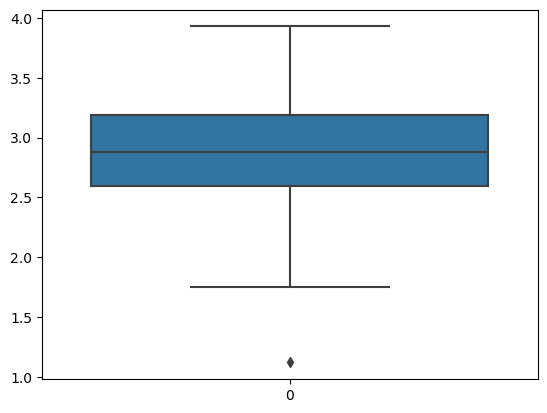

In [22]:
# Treating outlier by using log transformation
customer_tips['total_bill_trans']=np.log(customer_tips['total_bill'])
sns.boxplot(customer_tips['total_bill_trans'])
print('a boxplot after the treatment')

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

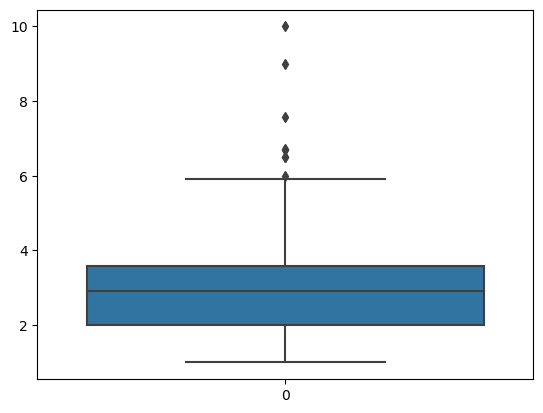

In [23]:
sns.boxplot(customer_tips['tip'])
plt.show()

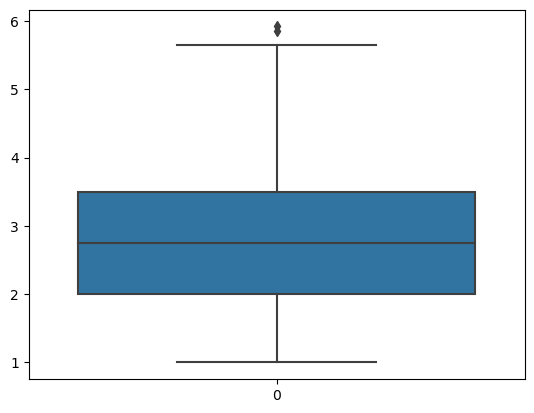

In [24]:
# Using IQR techinque
# Calculate the IQR for the 'tip' column
Q1 = customer_tips['tip'].quantile(.25)
Q2 = customer_tips['tip'].quantile(.50)
Q3 = customer_tips['tip'].quantile(.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers

customer_tips_out = customer_tips.loc[(customer_tips['tip'] < upper_bound) & (customer_tips['tip']>lower_bound)]

# Display the DataFrame without outliers
sns.boxplot(customer_tips_out['tip'])
plt.show()


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [25]:
customer_tips = pd.get_dummies(customer_tips,drop_first=True)
customer_tips.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
227,20.45,3.00,4,3.017983,True,False,True,False,False,False
11,35.26,5.00,4,3.562749,False,False,False,True,False,False
228,13.28,2.72,2,2.586259,True,False,True,False,False,False
192,28.44,2.56,2,3.347797,True,True,False,False,True,True
152,17.26,2.74,3,2.848392,True,False,False,True,False,False


In [26]:
# customer_tips['sex_Male'].map({False:0,True:1})
customer_tips['sex_Male'] = customer_tips['sex_Male'].map({False:0,True:1})
customer_tips['sex_Male']

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex_Male, Length: 243, dtype: int64

### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [27]:
total_bill_max = customer_tips['total_bill'].max()
total_bill_min = customer_tips['total_bill'].min()
range_of_bill = total_bill_max-total_bill_min
range_of_bill

47.74

In [28]:
## initialize of minmaxscalar
mm = MinMaxScaler()
mm

MinMaxScaler()

In [29]:
# Normalizing the values of the total_bill,so that the range will be 1.
customer_tips['total_bill_mm'] = mm.fit_transform(customer_tips[['total_bill']])
customer_tips['total_bill_mm']

0      0.291579
1      0.152283
2      0.375786
3      0.431713
4      0.450775
         ...   
239    0.543779
240    0.505027
241    0.410557
242    0.308965
243    0.329074
Name: total_bill_mm, Length: 243, dtype: float64

In [30]:
# checking the range after normalization
total_bill_max = customer_tips['total_bill_mm'].max()
total_bill_min = customer_tips['total_bill_mm'].min()
range_of_bill = total_bill_max - total_bill_min
range_of_bill

0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [31]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
#Encoding categorical variables
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [33]:
#Storing the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
x = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [34]:
# split the dataset
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size = .30)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [35]:
## Scaling the data using min max scaling
mm = MinMaxScaler()
mm

MinMaxScaler()

In [36]:
x_train.iloc[:,:2] = mm.fit_transform(x_train.iloc[:,:2])
x_test.iloc[:,:2] = mm.transform(x_test.iloc[:,:2])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [37]:
# Fitting a linear regression model on the train data
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
# making prediction on the test data
pred = lr.predict(x_test)

In [39]:
# computing r_squared value
print('r2-score test:',r2_score(y_test,pred))

r2-score test: 0.347054931542098


### Happy Learning:)